# Network Science - MDS - UDD 2021
## Introducción a Ciencia de Redes


#### Cristian Candia-Castro Vallejos, Ph.D.$^{1,2}$

- [1] Data Science Institute (IDS), Universidad del Desarrollo,Chile
- [2] Northwestern Institute on Complex Systems, Kellogg School of Management, Northwestern Unviersity, USA


## Trabajo Final

**Fecha de Presentaciones: Sábado 8 de Enero desde las 10 am**

- Máximo 10 minutos*

- 3 minutos de preguntas. (Total presentaciones 13 minutos).

- El "presentador" se elegirá al azar al momento de la presentación. Ojo, quién se ausente del grupo tendrá nota mínima por reglamento.
- **La idea es explicar todo!!!**




\* Máximo de slides NO HAY (recomendación general para presentaciones: máximo 1 slide por minuto).



##### La restricción de tiempo serán estrictas. Aproximadamente 10min + 3 min preguntas;

# Se entrega la presentación (PDF).
Deben subir su presentación (PDF) a CANVAS 24 horas antes de la presentación.

La primera diapositiva debe contener nombres / título.

### Criterio de evaluación:

    Uso de herramientas de red (integridad / uso correcto);
    Capacidad para extraer información/perspectivas de sus datos utilizando las herramientas de red; 
    (data != información)
    Calidad general del proyecto / presentación.



<img src="./img/im1.png" width="480">


### No es suficiente medir las cosas, es necesario discutir las ideas que ellas ofrecen (significado):
###### ¿Qué aprendiste de cada cantidad que mediste?
###### ¿Cuáles fueron tus expectativas?
###### ¿Cómo se comparan los resultados con tus expectativas?


# TIPS: Entre otras cosas, calcule:

- 1) Crear la grafo de carreras
- 2) Calcular 4 métricas de centralidad para cada nodo/carrera (grado, betweenness, PageRank y Closseness Centrality), interpetar cada una y dar ejemplos con carreras concretas elegidas por ustedes.
- 3) Graficar la distribución de grado (plot 1) y el coeficiente de clustering (eje-y) vs el grado de nodo (eje-x) (plot 2) (¿se parece a algún tipo de modelo visto en clases? ¿Por qué?)
- 4) Encontrar comunidades en la red usando el algoritmo de Louvain y el de Girvan Newman, interprete y compare los resultados de ambos. Grafique la red donde los colores sean según las comunidades econtradas.
- 5) Cree una matriz de distancias entre cada carrera de la red. (Explican que representa la distancia en la red y muestren la matriz en la presentación con un par de ejemplos entre pares de carrera). (revisar el comando `all_pairs_shortest_path`)
- 6) Metricas a nivel red: densidad, diámetro y modularidad (la sacan de las comunidades).





In [3]:
import pandas as pd

# Ejemplo: CARGA DATOS RED

Notar que esta red es **no-dirigida y el peso no lo usaremos** 

In [8]:
# source y target corresponde a los codigos de la columna `Generic Career ID`
edges2=pd.read_csv('./Data/Carreras_Chile_2012_2019_edges_0.05_.csv',sep=',')# edge list carreras

nodes=pd.read_csv('./Data/Carreras_Chile_2012_2019_nodes_0.05_.csv',sep=';')# atributos nodo
print(edges2.head())
(nodes.head())

   source  target
0       1       3
1       1       8
2       1      29
3       1      63
4       1     109


,id,OECD Area ID,OECD Area,OECD Subarea ID,OECD Subarea,Generic Career ID,Generic Career,label,cluster,acategory
0,1,8,Servicios,19,Servicios de Seguridad,1,Ingenieria en Prevencion de Riesgos,Ingenieria en Prevencion de Riesgos,Servicios,Ingenieria en Prevencion de Riesgos
1,2,8,Servicios,21,Servicios Personales,2,Administracion Turistica y Hotelera,Administracion Turistica y Hotelera,Servicios,Administracion Turistica y Hotelera
2,3,6,"Ingeniería, Industria y Construcción",14,Ingeniería y Profesiones Afines,3,Ingenieria Mecanica,Ingenieria Mecanica,"Ingeniería, Industria y Construcción",Ingenieria Mecanica
3,5,6,"Ingeniería, Industria y Construcción",2,Arquitectura y Construcción,5,Construccion Civil,Construccion Civil,"Ingeniería, Industria y Construcción",Construccion Civil
4,6,5,Humanidades y Artes,3,Artes,6,Diseno Grafico,Diseno Grafico,Humanidades y Artes,Diseno Grafico


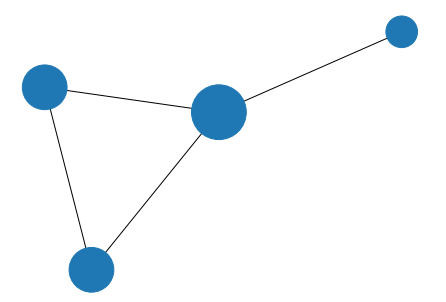

In [17]:
#Codigo para el tamaño del nodo

import networkx as nx
import matplotlib.pyplot as plt

g = nx.Graph()# ejemplo
g.add_edges_from([(1,2), (2,3), (2,4), (3,4)])#ejemplo

# ------
degree_g = dict(nx.degree(g))
clustering_g=dict(nx.clustering(g))

nx.draw(g, nodelist=degree_g.keys(), node_size=[v *1000 for v in degree_g.values()])
plt.show()

## Clustering en redes libre de escala y aleatorias

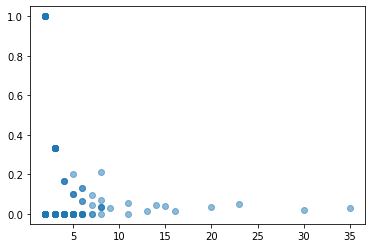

In [28]:
G_ba = nx.barabasi_albert_graph(200, 2)# Genera garfos libre de escala

degree_g = dict(nx.degree(G_ba))
clustering_g=dict(nx.clustering(G_ba))

x = degree_g.values()
y = clustering_g.values()


# colors = np.random.rand(N)
# area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, alpha=0.5)
plt.show()


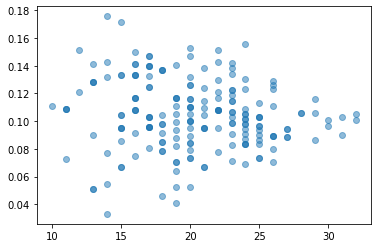

In [34]:
G_random = nx.erdos_renyi_graph(200, 0.1)


degree_g = dict(nx.degree(G_random))
clustering_g=dict(nx.clustering(G_random))

x = degree_g.values()
y = clustering_g.values()


# colors = np.random.rand(N)
# area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, alpha=0.5)
plt.show()